In [4]:
import os

if "src" not in os.listdir():
    os.chdir("../")

In [5]:
import pandas as pd
from tqdm import tqdm
from openai import OpenAI
from langchain_core.prompts import PromptTemplate
from langchain.output_parsers import ResponseSchema, StructuredOutputParser

tqdm.pandas()

docker run --runtime nvidia --gpus all \
    -v ~/.cache/huggingface:/root/.cache/huggingface \
    -p 8000:8000 \
    --ipc=host \
    vllm/vllm-openai:latest \
    --model Qwen/Qwen2.5-7B-Instruct --enable-prefix-caching

docker run --runtime nvidia --gpus all --rm \
    -v ~/.cache/huggingface:/root/.cache/huggingface \
    -p 8000:8000 \
    --ipc=host \
    vllm/vllm-openai:latest \
    --model IlyaGusev/saiga_llama3_8b --enable-prefix-caching

docker run --runtime nvidia --gpus all \
    -v ./models:/root/.cache/huggingface \
    -p 8000:8000 \
    --ipc=host \
    vllm/vllm-openai:latest \
    --model unsloth/qwen2.5-7b-instruct-bnb-4bit --enable-prefix-caching --download-dir /root/.cache/huggingface/qwen/vllm


docker run --runtime nvidia --gpus all --rm    \
    -v  ~/.cache/huggingface:/root/.cache/huggingface  \
    -v ./models:/root/models/ \
    -p 8000:8000   \
    --ipc=host   \
    vllm/vllm-openai:latest --model unsloth/Qwen2.5-7B-Instruct --enable-prefix-caching --enable-lora --lora-modules law-lora=/root/models/qwen/lora/

## –û–±—â–∏–π –∫–æ–¥ –¥–ª—è –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –∏ –æ—Ü–µ–Ω–∫–∏ –æ—Ç–≤–µ—Ç–æ–≤

In [6]:
openai_api_key = "EMPTY"
openai_api_base = "http://localhost:8000/v1"
lora_name = "law-lora"

client = OpenAI(
    api_key=openai_api_key,
    base_url=openai_api_base,
)

In [8]:
models = client.models.list()
model = models.data[0].id
model

'unsloth/Qwen2.5-7B-Instruct'

In [9]:
models.data

[Model(id='unsloth/Qwen2.5-7B-Instruct', created=1736846939, object='model', owned_by='vllm', root='unsloth/Qwen2.5-7B-Instruct', parent=None, max_model_len=32768, permission=[{'id': 'modelperm-87afededb6ce49fbb3e2e434672839c1', 'object': 'model_permission', 'created': 1736846939, 'allow_create_engine': False, 'allow_sampling': True, 'allow_logprobs': True, 'allow_search_indices': False, 'allow_view': True, 'allow_fine_tuning': False, 'organization': '*', 'group': None, 'is_blocking': False}]),
 Model(id='law-lora', created=1736846939, object='model', owned_by='vllm', root='/root/models/qwen/lora/', parent='unsloth/Qwen2.5-7B-Instruct', max_model_len=None, permission=[{'id': 'modelperm-b5ba3686891d41da89af032e5a2d7935', 'object': 'model_permission', 'created': 1736846939, 'allow_create_engine': False, 'allow_sampling': True, 'allow_logprobs': True, 'allow_search_indices': False, 'allow_view': True, 'allow_fine_tuning': False, 'organization': '*', 'group': None, 'is_blocking': False}])]

In [10]:
chat_completion = client.chat.completions.create(
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "Who won the world series in 2020?"},
        {"role": "assistant", "content": "The Los Angeles Dodgers won the World Series in 2020."},
        {"role": "user", "content": "Where was it played?"},
    ],
    model="law-lora",
)

print("Chat completion results:")
print(chat_completion.choices[0].message.content)

Chat completion results:
The 2020 World Series was played in a best-of-seven format at three neutral sites due to the ongoing COVID-19 pandemic. The games were played at Globe Life Field in Arlington, Texas; Truist Park in Atlanta, Georgia; and Dodger Stadium in Los Angeles, California.


In [11]:
client.chat.completions.create

<bound method Completions.create of <openai.resources.chat.completions.Completions object at 0x73385cf3b910>>

In [12]:
df = pd.read_pickle("./data/interim/evalutions/benchmarks/100_prompt.pkl")

In [13]:
df.columns

Index(['index', 'prompt', 'prompt_not_answer', 'answer', 'question',
       'prompt_list', 'prompt_list_not_answer', 'prompt_context',
       'prompt_context_not_answer', 'context', 'prompt_list_context',
       'prompt_list_context_not_answer'],
      dtype='object')

In [14]:
df["prompt_context_not_answer"][0]

'<|im_start|>system\n–¢—ã —é—Ä–∏—Å—Ç. –¢—ã –∫–æ–Ω—Å—É–ª—å—Ç–∏—Ä—É–µ—à—å –ª—é–¥–µ–π –ø–æ —Ä–∞–∑–Ω—ã–º –ø—Ä–æ–±–ª–µ–º–∞–º, –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ –ø—Ä–æ—á–∏—Ç–∞–π, —á—Ç–æ —Ç–µ–±–µ –ø–∏—à—É—Ç, –æ—Ç–≤–µ—Ç—å –Ω–∞ –ø–æ—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã–µ –≤–æ–ø—Ä–æ—Å—ã –∏ –¥–∞–π –∫–æ–Ω—Å—É–ª—å—Ç–∞—Ü–∏—é. –û—Ç–≤–µ—Ç –ø–∏—à–∏ —Ç–æ–ª—å–∫–æ –Ω–∞ –†–£–°–°–ö–û–ú —è–∑—ã–∫–µ!<|im_end|>\n<|im_start|>user\n–ß—Ç–æ –¥–µ–ª–∞—Ç—å –µ—Å–ª–∏ –Ω–µ –±–µ—Ä—É—Ç –∞ –ê—Ä–º–∏—é? –Ø –æ—á–µ–Ω—å —Ö–æ—á—É —Å–ª—É–∂–∏—Ç—å –†–æ—Å—Å–∏–∏.<|im_end|>\n<|im_start|>system\n–ü–µ—Ä–µ–¥ —Ç–µ–º –∫–∞–∫ –¥–∞—Ç—å –∫–æ–Ω—Å—É–ª—å—Ç–∞—Ü–∏—é –∏–∑—É—á–∏ –≤–æ–ø—Ä–æ—Å—ã –¥—Ä—É–≥–∏—Ö –ª—é–¥–µ–π –∏ –æ—Ç–≤–µ—Ç—ã –Ω–∞ –Ω–∏—Ö –¥—Ä—É–≥–∏—Ö —é—Ä–∏—Å—Ç–æ–≤:\n\n    –í–æ–ø—Ä–æ—Å –≥—Ä–∞–∂–¥–∞–Ω–∏–Ω–∞:\n    –ß—Ç–æ –¥–µ–ª–∞—Ç—å –µ—Å–ª–∏ –º–µ–Ω—è –Ω–µ –±–µ—Ä—É—Ç –≤ –∞—Ä–º–∏—é.\n    –û—Ç–≤–µ—Ç —é—Ä–∏—Å—Ç–∞:\n    –ù–∞—Å–ª–∞–∂–¥–∞—Ç—å—Å—è –∂–∏–∑–Ω—å—é.–ê –µ—Å–ª–∏ –≤–∞–º —Ç–∞–∫ —Ç—É–¥–∞ —Ö–æ—á–µ—Ç—Å—è-–æ–±–∂–∞–ª—É–π—Ç–µ —Ä–µ—à–µ–Ω–∏–µ –ø—Ä–∏–∑—ã–≤–Ω–æ–π –∫–æ–º–∏—Å—Å–∏–∏.\n  

In [15]:
stream = False
completion = client.completions.create(
    model=model, prompt=df["prompt_context_not_answer"][7], max_tokens=1000, seed=0
)

print(completion.choices[0].text)

–î–ª—è —Ç–æ–≥–æ —á—Ç–æ–±—ã –æ—Ç–≤–µ—Ç–∏—Ç—å –Ω–∞ –≤–∞—à –≤–æ–ø—Ä–æ—Å, –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ø–æ–Ω—è—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ –∫–ª—é—á–µ–≤—ã—Ö –º–æ–º–µ–Ω—Ç–æ–≤:

1. **–û—Å–Ω–æ–≤–Ω–æ–µ –ø—Ä–∞–≤–∏–ª–æ**: –í —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å –ñ–∏–ª–∏—â–Ω—ã–º –∫–æ–¥–µ–∫—Å–æ–º –†–§, –∑–µ–º–µ–ª—å–Ω—ã–π —É—á–∞—Å—Ç–æ–∫, –Ω–∞ –∫–æ—Ç–æ—Ä–æ–º —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω –º–Ω–æ–≥–æ–∫–≤–∞—Ä—Ç–∏—Ä–Ω—ã–π –¥–æ–º, —è–≤–ª—è–µ—Ç—Å—è –æ–±—â–∏–º –∏–º—É—â–µ—Å—Ç–≤–æ–º –¥–ª—è –≤—Å–µ—Ö —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–∏–∫–æ–≤ –ø–æ–º–µ—â–µ–Ω–∏–π –≤ —ç—Ç–æ–º –¥–æ–º–µ. –≠—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –≤—Å–µ –¥–æ–ª–∏ –≤ –ø—Ä–∞–≤–µ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–æ—Å—Ç–∏ –Ω–∞ —ç—Ç–æ—Ç —É—á–∞—Å—Ç–æ–∫ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–∞—Ç –≤—Å–µ–º —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–∏–∫–∞–º –∫–≤–∞—Ä—Ç–∏—Ä –ø—Ä–æ–ø–æ—Ä—Ü–∏–æ–Ω–∞–ª—å–Ω–æ –ø–ª–æ—â–∞–¥–∏ –∏—Ö –ø–æ–º–µ—â–µ–Ω–∏–π.

2. **–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–æ–ª–µ–π**: –ï—Å–ª–∏ –≤–∞—à –¥–æ–º —è–≤–ª—è–µ—Ç—Å—è –ø—è—Ç–∏–∫–≤–∞—Ä—Ç–∏—Ä–Ω—ã–º –∏ –≤—Å–µ –∫–≤–∞—Ä—Ç–∏—Ä—ã –Ω–∞—Ö–æ–¥—è—Ç—Å—è –≤ –¥–æ–ª–µ–≤–æ–π —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–æ—Å—Ç–∏, –≤—Å–µ —Å–æ

In [16]:
stream = False
completion = client.completions.create(
    model="law-lora", prompt=df["prompt_context_not_answer"][7], max_tokens=1000, seed=0
)

print(completion.choices[0].text)

–î–µ–ª–æ –≤ —Ç–æ–º, —á—Ç–æ –∑–µ–º–µ–ª—å–Ω—ã–π —É—á–∞—Å—Ç–æ–∫, –∫–æ—Ç–æ—Ä—ã–π —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω –ø–æ–¥ –º–Ω–æ–≥–æ–∫–≤–∞—Ä—Ç–∏—Ä–Ω—ã–º –¥–æ–º–æ–º, —è–≤–ª—è–µ—Ç—Å—è –æ–±—â–∏–º –∏–º—É—â–µ—Å—Ç–≤–æ–º —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–∏–∫–æ–≤ –ø–æ–º–µ—â–µ–Ω–∏–π, –Ω–∞—Ö–æ–¥—è—â–∏—Ö—Å—è –≤ —Ç–∞–∫–æ–º –¥–æ–º–µ, –≤ –ø—Ä–µ–¥–µ–ª–∞—Ö Swan –ø—Ä–∞–≤–∞, –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã—Ö –¥–æ–ª—è–º–∏ (—Å—Ç. 4, —á. 1 —Å—Ç. 36 –ñ–ö –†–§). –†–∞–∑–º–µ—Ä –¥–æ–ª–∏ –∫–∞–∂–¥–æ–≥–æ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–∏–∫–∞ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è –µ–≥–æ –¥–æ–ª—è–º–∏ –≤ –ø—Ä–∞–≤–µ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–æ—Å—Ç–∏ –∏–ª–∏ –≤–ª–∞–¥–µ–Ω–∏—è –Ω–∞ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–µ –ø–æ–º–µ—â–µ–Ω–∏—è –≤ —Ç–æ–º –¥–æ–º–µ. –í–ª–∏—è–µ—Ç —ç—Ç–æ –Ω–∞ –¥–æ–ª—é –≤ –ø—Ä–∞–≤–µ –Ω–∞ –æ–±—â–µ–µ –∏–º—É—â–µ—Å—Ç–≤–æ, –≤ —Ç.—á. –Ω–∞ –∑–µ–º–µ–ª—å–Ω—ã–π —É—á–∞—Å—Ç–æ–∫. –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –∑–µ–º–µ–ª—å–Ω—ã–π —É—á–∞—Å—Ç–æ–∫ –ø—Ä–∏–≤–∞—Ç–∏–∑–∏—Ä—É–µ—Ç—Å—è –≤ –¥–æ–ª–µ–≤—É—é —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–æ—Å—Ç—å –≤—Å–µ—Ö —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–∏–∫–æ–≤ –∫–≤–∞—Ä—Ç–∏—Ä, —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–Ω—ã—Ö 

In [17]:
chat_completion = client.chat.completions.create(
    messages=df["prompt_list_context_not_answer"][5], model=model, seed=1, max_tokens=1000
)

print("Chat completion results:")
print(chat_completion.choices[0].message.content)

Chat completion results:
–î–ª—è —Ç–æ–≥–æ —á—Ç–æ–±—ã –≤–µ—Ä–Ω—É—Ç—å –¥–µ–Ω—å–≥–∏ –∑–∞ –ø—Ä–µ–¥–æ–ø–ª–∞—Ç—É, –≤—ã –º–æ–∂–µ—Ç–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Å–ª–µ–¥—É—é—â—É—é —Å—Ç–∞—Ç—å—é –ó–∞–∫–æ–Ω–∞ –æ –∑–∞—â–∏—Ç–µ –ø—Ä–∞–≤ –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª–µ–π:

### –°—Ç–∞—Ç—å—è 23.1. –û—Ç–∫–∞–∑ –∏—Å–ø–æ–ª–Ω–∏—Ç–µ–ª—è (–¥–∏—Å—Ç–∞–Ω—Ü–∏–æ–Ω–Ω–æ–≥–æ –ø—Ä–æ–¥–∞–≤—Ü–∞) –æ—Ç –∏—Å–ø–æ–ª–Ω–µ–Ω–∏—è –¥–æ–≥–æ–≤–æ—Ä–∞ –∫—É–ø–ª–∏-–ø—Ä–æ–¥–∞–∂–∏, –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª–µ–Ω–∏—è —É—Å–ª—É–≥–∏ –∏–ª–∏ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è —Ä–∞–±–æ—Ç

–ï—Å–ª–∏ —Å—Ä–æ–∫ –∏—Å–ø–æ–ª–Ω–µ–Ω–∏—è –¥–æ–≥–æ–≤–æ—Ä–∞ –∏—Å—Ç–µ–∫ –∏ –º–µ–±–µ–ª—å –Ω–µ –±—ã–ª–∞ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª–µ–Ω–Ω–∞, –≤—ã –º–æ–∂–µ—Ç–µ —Ç—Ä–µ–±–æ–≤–∞—Ç—å –≤–æ–∑–≤—Ä–∞—Ç–∞ –ø—Ä–µ–¥–æ–ø–ª–∞—Ç—ã.

### –®–∞–≥–∏ –¥–ª—è –≤–æ–∑–≤—Ä–∞—Ç–∞ –¥–µ–Ω–µ–≥:

1. **–°–æ—Å—Ç–∞–≤—å—Ç–µ –ø—Ä–µ—Ç–µ–Ω–∑–∏—é**: –í –ø—Ä–µ—Ç–µ–Ω–∑–∏–∏ —É–∫–∞–∂–∏—Ç–µ:
   - –§–ò–û –∏ –∫–æ–Ω—Ç–∞–∫—Ç–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –ø—Ä–æ–¥–∞–≤—Ü–∞.
   - –î–∞–Ω–Ω—ã–µ –¥–æ–≥–æ–≤–æ—Ä–∞ –∫—É–ø–ª–∏-–ø—Ä–æ–¥–∞–∂–∏.
   - –°—É–º–º—É –ø—Ä–µ–¥–æ–ø–

In [46]:
# –î–ª—è –æ—Ç–≤–µ—Ç–∞ –∏—Å–ø–æ–ª—å–∑—É—é json —Å–ª–µ–¥—É—é—â–µ–≥–æ –≤–∏–¥–∞:
# {{
# "russian_language": –ò—Å–ø–æ–ª—å–∑—É–µ—Ç—å—Å—è —Ç–æ–ª—å–∫–æ —Ä—É—Å—Å–∫–∏–π —è–∑—ã–∫ –∏–ª–∏ –Ω–µ—Ç. –ï—Å–ª–∏ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—å—Å—è –∫–∏—Ç–∞–π—Å–∫–∏–π, —Ç–æ –≤—Å–µ–≥–¥–∞ —É–∫–∞–∑—ã–≤–∞–π "–Ω–µ—Ç",
# "matching_target_answer": –°–æ–æ—Ç–≤–µ—Å—Ç–≤–∏–µ —ç—Ç–∞–ª–æ–Ω–Ω–æ–º—É –æ—Ç–≤–µ—Ç—É. –£—á–∏—Ç—ã–≤–∞–π, —á—Ç–æ –æ—Ç–≤–µ—Ç –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å –∫–æ—Ä–æ—Ç–∫–∏–º –∏ –ø–æ–Ω—è—Ç–Ω—ã–º.
# "score": –§–∏–Ω–∞–ª—å–Ω–∞—è –æ—Ü–µ–Ω–∫–∞ —Å–æ–æ—Ç–≤–µ—Å—Ç–≤–∏—è –æ—Ç–≤–µ—Ç –∞—Å—Å–∏—Å—Ç–µ–Ω—Ç–∞ —ç—Ç–∞–ª–æ–Ω–Ω–æ–º—É –æ—Ç–≤–µ—Ç—É –æ—Ç 0 –¥–æ 10. –ï—Å–ª–∏ –æ—Ç–≤–µ—Ç –∞—Å—Å–∏—Å—Ç–µ–Ω—Ç–∞ –¥–ª–∏–Ω—ã–π —Å–Ω–∏–∂–∞–π 2 –±–∞–ª–ª–∞.
# }}

JUDGE_PROMPT = """
**–ò–Ω—Å—Ç—Ä—É–∫—Ü–∏—è –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –æ—Ç–≤–µ—Ç–æ–≤**
–¢—ã –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—å–Ω—ã–π —é—Ä–∏—Å—Ç, –∫–æ—Ç–æ—Ä—ã–π –æ—Ü–µ–Ω–∏–≤–∞–µ—Ç —Ä–∞–±–æ—Ç—É –∞—Å—Å–∏—Å—Ç–µ–Ω—Ç–æ–≤ –≤ —Å—Ñ–µ—Ä–µ —é—Ä–∏–¥–∏—á–µ—Å–∫–∏—Ö –∫–æ–Ω—Å—É–ª—å—Ç–∞—Ü–∏–π.
–¢–µ–±–µ –±—É–¥–µ—Ç –ø–µ—Ä–µ–¥–∞–Ω –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –≤–æ–ø—Ä–æ—Å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è, –æ—Ç–≤–µ—Ç –∞—Å—Å–∏—Ç–µ–Ω—Ç–∞ –Ω–∞ –≤–æ–ø—Ä–æ—Å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –∏ —ç—Ç–∞–ª–æ–Ω–Ω—ã–π –æ—Ç–≤–µ—Ç. 
–¢–≤–æ—è –∑–∞–¥–∞—á–∞ –æ—Ü–µ–Ω–∏—Ç—å –æ—Ç–≤–µ—Ç –∞—Å—Å–∏—Ç–µ–Ω—Ç–∞ –∏ –µ–≥–æ —Å–æ–æ—Ç–≤–µ—Å—Ç–≤–∏–µ —ç—Ç–∞–ª–æ–Ω–Ω–æ–º—É –æ—Ç–≤–µ—Ç—É –∏ –≤—ã—Å—Ç–∞–≤–∏—Ç—å —Ñ–∏–Ω–∞–ª—å–Ω—É—é –æ—Ü–µ–Ω–∫—É –æ—Ç 0 –¥–æ 5, –≥–¥–µ 0 —Å–∞–º–∞—è –ø–ª–æ—Ö–∞—è –æ—Ü–µ–Ω–∫–∞, –∞ 5 –ª—É—á—à–∞—è.
–ó–∞ —É—Å–ø–µ—à–Ω–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–Ω—É—é —Ä–∞–±–æ—Ç—É —Ç–µ–±–µ –∑–∞–ø–ª–∞—Ç—è—Ç 10$.

**–ö—Ä–∏—Ç–µ—Ä–∏–∏ –∞–Ω–∞–ª–∏–∑–∞ –æ—Ç–≤–µ—Ç–∞**:
1. –£—á–∏—Ç—ã–≤–∞–π –¥–ª–∏–Ω—É –æ—Ç–≤–µ—Ç–∞, –µ—Å–ª–∏ –æ—Ç–≤–µ—Ç —Å–∏–ª—å–Ω–æ –±–æ–ª—å—à–µ —ç—Ç–∞–ª–æ–Ω–Ω–æ–≥–æ —Å–Ω–∏–∂–∞–π –æ—Ü–µ–Ω–∫—É.
2. –£—á–∏—Ç—ã–≤–∞–π –Ω–∞—Å–∫–æ–ª—å–∫–æ –æ—Ç–≤–µ—Ç –¥–∞–Ω –ø–æ —Å—É—â–µ—Å—Ç–≤—É. –ï—Å–ª–∏ –∞—Å—Å–∏—Å—Ç–µ–Ω—Ç –Ω–µ –æ—Ç–≤–µ—á–∞–µ—Ç –Ω–∞ –≤–æ–ø—Ä–æ—Å, —Ç–æ —Å–Ω–∏–∂–∞–π –æ—Ü–µ–Ω–∫—É.
3. –ï—Å–ª–∏ –≤ –æ—Ç–≤–µ—Ç–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª—Å—è –Ω–µ —Ä—É—Å—Å–∫–∏–π —è–∑—ã–∫, —Ç–æ —Å–Ω–∏–∂–∞–π –æ—Ü–µ–Ω–∫—É.
4. –£—á–∏—Ç—ã–≤–∞–π —Ñ–∞–∫—Ç–∏—á–µ—Å–∫—É—é –ø—Ä–∞–≤–∏–ª—å–Ω–æ—Å—Ç—å –æ—Ç–≤–µ—Ç–∞, –µ—Å–ª–∏ –æ—Ç–≤–µ—Ç –∞—Å—Å–∏—Å—Ç–µ–Ω—Ç–∞ –ø–æ —Å—É—Ç–∏ –ø—Ä–æ—Ç–∏–≤–æ—Ä–µ—á–∏—Ç —ç—Ç–∞–ª–æ–Ω–Ω–æ–º—É –æ—Ç–≤–µ—Ç—É, —Ç–æ —Å—Ç–∞–≤—å –Ω–µ –±–æ–ª—å—à–µ 2—Ö –±–∞–ª–ª–æ–≤

**–§–æ—Ä–º–∞—Ç –æ—Ç–≤–µ—Ç–∞**
{format_instructions}

–ü—Ä–∏–º–µ—Ä —Ñ–æ—Ä–º–∞—Ç–∞ –æ—Ç–≤–µ—Ç–∞:
```json 
{{
	"russian_language": "–¥–∞",
	"matching_target_answer": "–û—Ç–≤–µ—Ç –Ω–µ —Å–æ–æ—Ç–≤–µ—Å—Ç–≤—É–µ—Ç —ç—Ç–∞–ª–æ–Ω–Ω–æ–º—É –æ—Ç–≤–µ—Ç—É",
    "correctness": "–Ω–µ—Ç",
	"score": 1
}}
```

```json 
{{
	"russian_language": "–¥–∞",
	"matching_target_answer": "–û—Ç–≤–µ—Ç —Å–æ–æ—Ç–≤–µ—Å—Ç–≤—É–µ—Ç —ç—Ç–∞–ª–æ–Ω–Ω–æ–º—É –æ—Ç–≤–µ—Ç—É, –Ω–æ —Å–æ–¥–µ—Ä–∂–∏—Ç –ª–∏—à–Ω—é—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –∏ —Å–ª–∏—à–∫–æ–º –¥–ª–∏–Ω–Ω—ã–π",
    "correctness": "–¥–∞",
	"score": 4
}}
```
–ü—Ä–∏ –Ω–∞–ø–∏—Å–∞–Ω–∏–∏ –æ—Ç–≤–µ—Ç–∞ –Ω–µ –ø–∏—à–∏ –Ω–∏—á–µ–≥–æ, —á—Ç–æ –Ω–µ –º–æ–∂–µ—Ç –±—ã—Ç—å —Ä–∞—Å–ø–æ–∑–Ω–∞–Ω–æ –∫–∞–∫ json-—Ñ–∞–π–ª
–ü—Ä–∏–º–µ—Ä, –∫–æ—Ç–æ—Ä—ã–π –Ω–µ –±—É–¥–µ—Ç —Ä–∞—Å–ø–æ–∑–Ω–∞–Ω, –∫–∞–∫ json:
```json 
{{
	"russian_language": "–¥–∞", // –∫–∞–∫–æ–π-—Ç–æ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π
	"matching_target_answer": "–û—Ç–≤–µ—Ç —Å–æ–æ—Ç–≤–µ—Å—Ç–≤—É–µ—Ç —ç—Ç–∞–ª–æ–Ω–Ω–æ–º—É –æ—Ç–≤–µ—Ç—É, –Ω–æ —Å–æ–¥–µ—Ä–∂–∏—Ç –ª–∏—à–Ω—é—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –∏ —Å–ª–∏—à–∫–æ–º –¥–ª–∏–Ω–Ω—ã–π", // –∫–∞–∫–æ–π-—Ç–æ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π
    "correctness": "–¥–∞", // –∫–∞–∫–æ–π-—Ç–æ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π
	"score": 4 // –∫–∞–∫–æ–π-—Ç–æ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π
}}
```


**–î–∞–Ω–Ω—ã–µ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞**:
–í–æ–ø—Ä–æ—Å: {question}

–û—Ç–≤–µ—Ç –∞—Å—Å–∏—Å—Ç–µ–Ω—Ç–∞: {answer}

–≠—Ç–∞–ª–æ–Ω–Ω—ã–π –æ—Ç–≤–µ—Ç: {target}

**–¢–≤–æ–π –æ—Ç–≤–µ—Ç**
–¢–µ–ø–µ—Ä—å –¥–∞–π –æ—Ü–µ–Ω–∫—É –æ—Ç–≤–µ—Ç–∞ –∞—Å—Å–∏—Ç–µ–Ω—Ç–∞:
"""

In [41]:
russian_language = ResponseSchema(
    name="russian_language",
    description=" –ò—Å–ø–æ–ª—å–∑—É–µ—Ç—å—Å—è —Ç–æ–ª—å–∫–æ —Ä—É—Å—Å–∫–∏–π —è–∑—ã–∫ –∏–ª–∏ –Ω–µ—Ç. –ï—Å–ª–∏ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—å—Å—è –∫–∏—Ç–∞–π—Å–∫–∏–π, —Ç–æ –≤—Å–µ–≥–¥–∞ —É–∫–∞–∑—ã–≤–∞–π '–Ω–µ—Ç'",
)

matching_target_answer = ResponseSchema(
    name="matching_target_answer",
    description="–°–æ–æ—Ç–≤–µ—Å—Ç–≤–∏–µ —ç—Ç–∞–ª–æ–Ω–Ω–æ–º—É –æ—Ç–≤–µ—Ç—É. –£—á–∏—Ç—ã–≤–∞–π, —á—Ç–æ –æ—Ç–≤–µ—Ç –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å –∫–æ—Ä–æ—Ç–∫–∏–º –∏ –ø–æ–Ω—è—Ç–Ω—ã–º.",
)

correctness = ResponseSchema(
    name="correctness",
    description=(
        "–ó–¥–µ—Å—å —É–∫–∞–∂–∏ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–∞—è –ª–∏ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –∏–∑–ª–æ–∂–µ–Ω–Ω–∞—è –≤ –æ—Ç–≤–µ—Ç–µ, —Ç–æ–µ—Å—Ç—å –ø—Ä–æ—Ç–∏–≤–æ—Ä–µ—á–∏—Ç –ª–∏ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è "
        "–≤ –æ—Ç–≤–µ—Ç–µ –∞—Å—Å–∏—Å—Ç–µ–Ω—Ç–∞ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –≤ —ç—Ç–∞–ª–æ–Ω–Ω–æ–º –æ—Ç–≤–µ—Ç–µ. "
        "–ï—Å–ª–∏ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –Ω–µ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–∞—è, —Ç–æ –ø–∏—à–∏ '–Ω–µ—Ç', –µ—Å–ª–∏ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–∞—è, —Ç–æ '–¥–∞'"
    ),
)

score = ResponseSchema(
    name="score",
    description="–§–∏–Ω–∞–ª—å–Ω–∞—è –æ—Ü–µ–Ω–∫–∞ –æ—Ç–≤–µ—Ç–∞ –∞—Å—Å–∏—Å—Ç–µ–Ω—Ç–∞ –æ—Ç 0 –¥–æ 5.",
    type="int",
)


response_schemas = [russian_language, matching_target_answer, correctness, score]

output_parser = StructuredOutputParser.from_response_schemas(response_schemas)
format_instructions = output_parser.get_format_instructions()
print(format_instructions)

The output should be a markdown code snippet formatted in the following schema, including the leading and trailing "```json" and "```":

```json
{
	"russian_language": string  //  –ò—Å–ø–æ–ª—å–∑—É–µ—Ç—å—Å—è —Ç–æ–ª—å–∫–æ —Ä—É—Å—Å–∫–∏–π —è–∑—ã–∫ –∏–ª–∏ –Ω–µ—Ç. –ï—Å–ª–∏ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—å—Å—è –∫–∏—Ç–∞–π—Å–∫–∏–π, —Ç–æ –≤—Å–µ–≥–¥–∞ —É–∫–∞–∑—ã–≤–∞–π '–Ω–µ—Ç'
	"matching_target_answer": string  // –°–æ–æ—Ç–≤–µ—Å—Ç–≤–∏–µ —ç—Ç–∞–ª–æ–Ω–Ω–æ–º—É –æ—Ç–≤–µ—Ç—É. –£—á–∏—Ç—ã–≤–∞–π, —á—Ç–æ –æ—Ç–≤–µ—Ç –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å –∫–æ—Ä–æ—Ç–∫–∏–º –∏ –ø–æ–Ω—è—Ç–Ω—ã–º.
	"correctness": string  // –ó–¥–µ—Å—å —É–∫–∞–∂–∏ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–∞—è –ª–∏ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –∏–∑–ª–æ–∂–µ–Ω–Ω–∞—è –≤ –æ—Ç–≤–µ—Ç–µ, —Ç–æ–µ—Å—Ç—å –ø—Ä–æ—Ç–∏–≤–æ—Ä–µ—á–∏—Ç –ª–∏ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –≤ –æ—Ç–≤–µ—Ç–µ –∞—Å—Å–∏—Å—Ç–µ–Ω—Ç–∞ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –≤ —ç—Ç–∞–ª–æ–Ω–Ω–æ–º –æ—Ç–≤–µ—Ç–µ. –ï—Å–ª–∏ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –Ω–µ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–∞—è, —Ç–æ –ø–∏—à–∏ '–Ω–µ—Ç', –µ—Å–ª–∏ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–∞—è, —Ç–æ '–¥–∞'
	"score": int  // –§–∏–Ω–∞–ª—å–Ω–

In [20]:
prompt_judge = PromptTemplate(
    input_variables=["question", "answer", "target"], template=JUDGE_PROMPT
)
print(
    prompt_judge.invoke(
        input={
            "format_instructions": format_instructions,
            "question": "owl",
            "answer": "owl1",
            "target": "owl2",
        }
    ).text
)


**–ò–Ω—Å—Ç—Ä—É–∫—Ü–∏—è –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –æ—Ç–≤–µ—Ç–æ–≤**
–¢—ã –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—å–Ω—ã–π —é—Ä–∏—Å—Ç, –∫–æ—Ç–æ—Ä—ã–π –æ—Ü–µ–Ω–∏–≤–∞–µ—Ç —Ä–∞–±–æ—Ç—É –∞—Å—Å–∏—Å—Ç–µ–Ω—Ç–æ–≤ –≤ —Å—Ñ–µ—Ä–µ —é—Ä–∏–¥–∏—á–µ—Å–∫–∏—Ö –∫–æ–Ω—Å—É–ª—å—Ç–∞—Ü–∏–π.
–¢–µ–±–µ –±—É–¥–µ—Ç –ø–µ—Ä–µ–¥–∞–Ω –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –≤–æ–ø—Ä–æ—Å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è, –æ—Ç–≤–µ—Ç –∞—Å—Å–∏—Ç–µ–Ω—Ç–∞ –Ω–∞ –≤–æ–ø—Ä–æ—Å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –∏ —ç—Ç–∞–ª–æ–Ω–Ω—ã–π –æ—Ç–≤–µ—Ç. 
–¢–≤–æ—è –∑–∞–¥–∞—á–∞ –æ—Ü–µ–Ω–∏—Ç—å –æ—Ç–≤–µ—Ç –∞—Å—Å–∏—Ç–µ–Ω—Ç–∞ –∏ –µ–≥–æ —Å–æ–æ—Ç–≤–µ—Å—Ç–≤–∏–µ —ç—Ç–∞–ª–æ–Ω–Ω–æ–º—É –æ—Ç–≤–µ—Ç—É –∏ –≤—ã—Å—Ç–∞–≤–∏—Ç—å —Ñ–∏–Ω–∞–ª—å–Ω—É—é –æ—Ü–µ–Ω–∫—É –æ—Ç 0 –¥–æ 5, –≥–¥–µ 0 —Å–∞–º–∞—è –ø–ª–æ—Ö–∞—è –æ—Ü–µ–Ω–∫–∞, –∞ 5 –ª—É—á—à–∞—è.
–ó–∞ —É—Å–ø–µ—à–Ω–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–Ω—É—é —Ä–∞–±–æ—Ç—É —Ç–µ–±–µ –∑–∞–ø–ª–∞—Ç—è—Ç 10$.

**–ö—Ä–∏—Ç–µ—Ä–∏–∏ –∞–Ω–∞–ª–∏–∑–∞ –æ—Ç–≤–µ—Ç–∞**:
1. –£—á–∏—Ç—ã–≤–∞–π –¥–ª–∏–Ω—É –æ—Ç–≤–µ—Ç–∞, –µ—Å–ª–∏ –æ—Ç–≤–µ—Ç —Å–∏–ª—å–Ω–æ –±–æ–ª—å—à–µ —ç—Ç–∞–ª–æ–Ω–Ω–æ–≥–æ —Å–Ω–∏–∂–∞–π –æ—Ü–µ–Ω–∫—É.
2. –

In [21]:
df["prompt_list_context_not_answer"][4]

[{'role': 'system',
  'content': '–¢—ã —é—Ä–∏—Å—Ç. –¢—ã –∫–æ–Ω—Å—É–ª—å—Ç–∏—Ä—É–µ—à—å –ª—é–¥–µ–π –ø–æ —Ä–∞–∑–Ω—ã–º –ø—Ä–æ–±–ª–µ–º–∞–º, –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ –ø—Ä–æ—á–∏—Ç–∞–π, —á—Ç–æ —Ç–µ–±–µ –ø–∏—à—É—Ç, –æ—Ç–≤–µ—Ç—å –Ω–∞ –ø–æ—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã–µ –≤–æ–ø—Ä–æ—Å—ã –∏ –¥–∞–π –∫–æ–Ω—Å—É–ª—å—Ç–∞—Ü–∏—é. –û—Ç–≤–µ—Ç –ø–∏—à–∏ —Ç–æ–ª—å–∫–æ –Ω–∞ –†–£–°–°–ö–û–ú —è–∑—ã–∫–µ!'},
 {'role': 'user',
  'content': '–ú–æ–∂–µ—Ç –ª–∏ —Ä–µ–±—ë–Ω–æ–∫ —Å —Ä–æ—Å—Å–∏–π—Å–∫–∏–º –≥—Ä–∞–∂–¥–∞–Ω—Å—Ç–≤–æ–º –±—ã—Ç—å –ø–µ—Ä–µ–≤–µ–¥—ë–Ω –≤ —à–∫–æ–ª—É –ö–ó? –ü–æ –Ω–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ –∫–∞–∑–∞—Ö. –ë–µ–∑ –≤–Ω–∂, –≤–Ω–∂ –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ.'},
 {'role': 'system',
  'content': '–ü–µ—Ä–µ–¥ —Ç–µ–º –∫–∞–∫ –¥–∞—Ç—å –∫–æ–Ω—Å—É–ª—å—Ç–∞—Ü–∏—é –∏–∑—É—á–∏ –≤–æ–ø—Ä–æ—Å—ã –¥—Ä—É–≥–∏—Ö –ª—é–¥–µ–π –∏ –æ—Ç–≤–µ—Ç—ã –Ω–∞ –Ω–∏—Ö –¥—Ä—É–≥–∏—Ö —é—Ä–∏—Å—Ç–æ–≤:\n\n    –í–æ–ø—Ä–æ—Å –≥—Ä–∞–∂–¥–∞–Ω–∏–Ω–∞:\n    –ú–æ–∂–µ—Ç –ª–∏ —Ä–µ–±—ë–Ω–æ–∫ —Å –ö–∞–∑–∞—Ö—Å—Ç–∞–Ω—Å–∫–∏–º –≥—Ä–∞–∂–¥–∞–Ω—Å—Ç–≤–æ–º –ø–æ–π—Ç–∏–≤ –≤ —à–∫–æ–ª—É –≤ –†–æ—Å—Å–∏–∏.\n    –

In [22]:
index = 16
chat_completion = client.chat.completions.create(
    messages=df["prompt_list_context_not_answer"][index], model=model, seed=1, max_tokens=1000
)

answer = chat_completion.choices[0].message.content

promt_final = prompt_judge.invoke(
    {
        "format_instructions": format_instructions,
        "question": df["question"][index],
        "answer": answer,
        "target": df["answer"][index],
    }
).text

completion = client.chat.completions.create(
    messages=[{"role": "system", "content": promt_final}], model=model, seed=1, max_tokens=1000
)

evaluation = completion.choices[0].message.content
print(evaluation)
output_dict = output_parser.parse(evaluation)
output_dict

```json
{
	"russian_language": "–¥–∞",
	"matching_target_answer": "–û—Ç–≤–µ—Ç —Å–æ–¥–µ—Ä–∂–∏—Ç –æ—Å–Ω–æ–≤–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –∏–∑ —ç—Ç–∞–ª–æ–Ω–Ω–æ–≥–æ –æ—Ç–≤–µ—Ç–∞, –Ω–æ –Ω–µ –ø–æ–ª–Ω–æ—Å—Ç—å—é —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –µ–≥–æ —Å—Ç—Ä—É–∫—Ç—É—Ä–µ –∏ –¥–µ—Ç–∞–ª–∏–∑–∞—Ü–∏–∏.",
    "correctness": "–¥–∞",
	"score": 3
}
```


{'russian_language': '–¥–∞',
 'matching_target_answer': '–û—Ç–≤–µ—Ç —Å–æ–¥–µ—Ä–∂–∏—Ç –æ—Å–Ω–æ–≤–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –∏–∑ —ç—Ç–∞–ª–æ–Ω–Ω–æ–≥–æ –æ—Ç–≤–µ—Ç–∞, –Ω–æ –Ω–µ –ø–æ–ª–Ω–æ—Å—Ç—å—é —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –µ–≥–æ —Å—Ç—Ä—É–∫—Ç—É—Ä–µ –∏ –¥–µ—Ç–∞–ª–∏–∑–∞—Ü–∏–∏.',
 'correctness': '–¥–∞',
 'score': 3}

In [23]:
promt_final

'\n**–ò–Ω—Å—Ç—Ä—É–∫—Ü–∏—è –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –æ—Ç–≤–µ—Ç–æ–≤**\n–¢—ã –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—å–Ω—ã–π —é—Ä–∏—Å—Ç, –∫–æ—Ç–æ—Ä—ã–π –æ—Ü–µ–Ω–∏–≤–∞–µ—Ç —Ä–∞–±–æ—Ç—É –∞—Å—Å–∏—Å—Ç–µ–Ω—Ç–æ–≤ –≤ —Å—Ñ–µ—Ä–µ —é—Ä–∏–¥–∏—á–µ—Å–∫–∏—Ö –∫–æ–Ω—Å—É–ª—å—Ç–∞—Ü–∏–π.\n–¢–µ–±–µ –±—É–¥–µ—Ç –ø–µ—Ä–µ–¥–∞–Ω –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –≤–æ–ø—Ä–æ—Å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è, –æ—Ç–≤–µ—Ç –∞—Å—Å–∏—Ç–µ–Ω—Ç–∞ –Ω–∞ –≤–æ–ø—Ä–æ—Å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –∏ —ç—Ç–∞–ª–æ–Ω–Ω—ã–π –æ—Ç–≤–µ—Ç. \n–¢–≤–æ—è –∑–∞–¥–∞—á–∞ –æ—Ü–µ–Ω–∏—Ç—å –æ—Ç–≤–µ—Ç –∞—Å—Å–∏—Ç–µ–Ω—Ç–∞ –∏ –µ–≥–æ —Å–æ–æ—Ç–≤–µ—Å—Ç–≤–∏–µ —ç—Ç–∞–ª–æ–Ω–Ω–æ–º—É –æ—Ç–≤–µ—Ç—É –∏ –≤—ã—Å—Ç–∞–≤–∏—Ç—å —Ñ–∏–Ω–∞–ª—å–Ω—É—é –æ—Ü–µ–Ω–∫—É –æ—Ç 0 –¥–æ 5, –≥–¥–µ 0 —Å–∞–º–∞—è –ø–ª–æ—Ö–∞—è –æ—Ü–µ–Ω–∫–∞, –∞ 5 –ª—É—á—à–∞—è.\n–ó–∞ —É—Å–ø–µ—à–Ω–æ –≤—ã–ø–æ–ª–Ω–µ–Ω–Ω—É—é —Ä–∞–±–æ—Ç—É —Ç–µ–±–µ –∑–∞–ø–ª–∞—Ç—è—Ç 10$.\n\n**–ö—Ä–∏—Ç–µ—Ä–∏–∏ –∞–Ω–∞–ª–∏–∑–∞ –æ—Ç–≤–µ—Ç–∞**:\n1. –£—á–∏—Ç—ã–≤–∞–π –¥–ª–∏–Ω—É –æ—Ç–≤–µ—Ç–∞, –µ—Å–ª–∏ –æ—Ç–≤–µ—Ç —Å–∏–ª—å–Ω–æ –±–æ–ª—å—à–µ —ç—Ç–∞–ª–æ–Ω–Ω–æ–≥–æ —Å–Ω–∏–∂–∞–π –æ—Ü–µ–Ω–

In [24]:
evaluation

'```json\n{\n\t"russian_language": "–¥–∞",\n\t"matching_target_answer": "–û—Ç–≤–µ—Ç —Å–æ–¥–µ—Ä–∂–∏—Ç –æ—Å–Ω–æ–≤–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –∏–∑ —ç—Ç–∞–ª–æ–Ω–Ω–æ–≥–æ –æ—Ç–≤–µ—Ç–∞, –Ω–æ –Ω–µ –ø–æ–ª–Ω–æ—Å—Ç—å—é —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –µ–≥–æ —Å—Ç—Ä—É–∫—Ç—É—Ä–µ –∏ –¥–µ—Ç–∞–ª–∏–∑–∞—Ü–∏–∏.",\n    "correctness": "–¥–∞",\n\t"score": 3\n}\n```'

In [25]:
df.head(1)

index                                             prompt  \
0  10959844  <|im_start|>system\n–¢—ã —é—Ä–∏—Å—Ç. –¢—ã –∫–æ–Ω—Å—É–ª—å—Ç–∏—Ä—É–µ—à...   

                                   prompt_not_answer  \
0  <|im_start|>system\n–¢—ã —é—Ä–∏—Å—Ç. –¢—ã –∫–æ–Ω—Å—É–ª—å—Ç–∏—Ä—É–µ—à...   

                                              answer  \
0  –ï—Å–ª–∏ –≤–æ–µ–Ω–∫–æ–º–∞—Ç –æ—Ç–∫–∞–∑–∞–ª –æ—Ñ–∏—Ü–∏–∞–ª—å–Ω–æ, –æ–±–∂–∞–ª—É–π—Ç–µ –µ...   

                                            question  \
0  –ß—Ç–æ –¥–µ–ª–∞—Ç—å –µ—Å–ª–∏ –Ω–µ –±–µ—Ä—É—Ç –∞ –ê—Ä–º–∏—é? –Ø –æ—á–µ–Ω—å —Ö–æ—á—É...   

                                         prompt_list  \
0  [{'role': 'system', 'content': '–¢—ã —é—Ä–∏—Å—Ç. –¢—ã –∫...   

                              prompt_list_not_answer  \
0  [{'role': 'system', 'content': '–¢—ã —é—Ä–∏—Å—Ç. –¢—ã –∫...   

                                      prompt_context  \
0  <|im_start|>system\n–¢—ã —é—Ä–∏—Å—Ç. –¢—ã –∫–æ–Ω—Å—É–ª—å—Ç–∏—Ä—É–µ—à...   

                           prompt_context_not_answer  \
0  <|im_start|>system\n–¢—ã —é—Ä–∏—Å—Ç. –¢—ã –∫–æ–Ω—Å—É–ª—å—Ç–∏—Ä—É–µ—à...   

                                             context  \
0  –ü–µ—Ä–µ–¥ —Ç–µ–º –∫–∞–∫ –¥–∞—Ç—å –∫–æ–Ω—Å—É–ª—å—Ç–∞—Ü–∏—é –∏–∑—É—á–∏ –≤–æ–ø—Ä–æ—Å—ã ...   

                                 prompt_list_context  \
0  [{'role': 'system', 'content': '–¢—ã —é—Ä–∏—Å—Ç. –¢—ã –∫...   

                      prompt_list_context_not_answer  
0  [{'role': 'system', 'content': '–¢—ã —é—Ä–∏—Å—Ç. –¢—ã –∫...

### –ì–µ–Ω–µ—Ä–∞—Ü–∏—è –æ—Ç–≤–µ—Ç–∞

In [26]:
def generate_answer(df: pd.DataFrame, model):
    eval_list = []
    for index in tqdm(range(len(df))):
        prompt_list_not_answer = df["prompt_list_not_answer"][index]
        prompt_list_context_not_answer = df["prompt_list_context_not_answer"][index]
        target = df["answer"][index]
        question = df["question"][index]
        context = df["context"][index]

        chat_completion = client.chat.completions.create(
            messages=prompt_list_not_answer,
            model=model,
            seed=1,
            max_tokens=1000,
            stream=True,
        )
        chat_completion_context = client.chat.completions.create(
            messages=prompt_list_context_not_answer,
            model=model,
            seed=1,
            max_tokens=1000,
            stream=True,
        )

        answer = "".join([i.choices[0].delta.content for i in chat_completion])
        answer_context = "".join([i.choices[0].delta.content for i in chat_completion_context])

        eval_list.append(
            {
                "prompt_list_not_answer": prompt_list_not_answer,
                "prompt_list_context_not_answer": prompt_list_context_not_answer,
                "target": target,
                "question": question,
                "context": context,
                "answer": answer,
                "answer_context": answer_context,
            }
        )
    return eval_list

In [27]:
eval_list_base_model = generate_answer(df, model)
eval_list_lora = generate_answer(df, lora_name)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [06:15<00:00,  3.75s/it]


### –û—Ü–µ–Ω–∫–∞ –æ—Ç–≤–µ—Ç–∞

In [50]:
def evalutions_answers(eval_list, model):
    for index in tqdm(range(len(eval_list))):
        answer = eval_list[index]["answer"]
        answer_context = eval_list[index]["answer_context"]
        target = eval_list[index]["target"]

        promt_eval = prompt_judge.invoke(
            {
                "format_instructions": format_instructions,
                "question": df["question"][index],
                "answer": answer,
                "target": target,
            }
        ).text
        promt_eval_context = prompt_judge.invoke(
            {
                "format_instructions": format_instructions,
                "question": df["question"][index],
                "answer": answer_context,
                "target": target,
            }
        ).text

        chat_completion = client.chat.completions.create(
            messages=[{"role": "system", "content": promt_eval}],
            model=model,
            seed=1,
            max_tokens=1000,
            stream=True,
        )
        chat_completion_context = client.chat.completions.create(
            messages=[{"role": "system", "content": promt_eval_context}],
            model=model,
            seed=1,
            max_tokens=1000,
            stream=True,
        )
        evalution = "".join([i.choices[0].delta.content for i in chat_completion])
        evalution_context = "".join([i.choices[0].delta.content for i in chat_completion_context])

        try:
            evalution = output_parser.parse(evalution)
        except Exception as e:
            chat_completion = client.chat.completions.create(
                messages=[
                    {"role": "system", "content": promt_eval},
                    {"role": "assistant", "content": evalution},
                    {"role": "user", "content": "–¢—ã –≤–µ—Ä–Ω—É–ª json, –∫–æ—Ç–æ—Ä—ã–π –Ω–µ –º–æ–∂–µ—Ç –±—ã—Ç—å —Ä–∞—Å–ø–∞—Ä—â–µ–Ω! –ü–µ—Ä–µ–ø–∏—à–∏ –µ–≥–æ —Ç–∞–∫, —á—Ç–æ–±—ã –µ–≥–æ –º–æ–∂–Ω–æ –±—ã–ª–æ —Å–ø–∞—Ä—Å–∏—Ç—å!"},
                ],
                model=model,
                seed=1,
                max_tokens=1000,
                stream=True,
            )
            evalution = "".join([i.choices[0].delta.content for i in chat_completion])
            evalution = output_parser.parse(evalution)

        try:
            evalution_context = output_parser.parse(evalution_context)
        except Exception as e:
            chat_completion_context = client.chat.completions.create(
                messages=[
                    {"role": "system", "content": promt_eval},
                    {"role": "assistant", "content": evalution_context},
                    {"role": "user", "content": "–¢—ã –≤–µ—Ä–Ω—É–ª json, –∫–æ—Ç–æ—Ä—ã–π –Ω–µ –º–æ–∂–µ—Ç –±—ã—Ç—å —Ä–∞—Å–ø–∞—Ä—â–µ–Ω! –ü–µ—Ä–µ–ø–∏—à–∏ –µ–≥–æ —Ç–∞–∫, —á—Ç–æ–±—ã –µ–≥–æ –º–æ–∂–Ω–æ –±—ã–ª–æ —Å–ø–∞—Ä—Å–∏—Ç—å!"},
                ],
                model=model,
                seed=1,
                max_tokens=1000,
                stream=True,
            )
            evalution_context = "".join([i.choices[0].delta.content for i in chat_completion_context])
            evalution_context = output_parser.parse(evalution_context)

        eval_list[index]["promt_eval"] = promt_eval
        eval_list[index]["promt_eval_context"] = promt_eval_context
        eval_list[index]["evalution"] = evalution
        eval_list[index]["evalution_context"] = evalution_context
        eval_list[index]["correctness"] = evalution["correctness"]
        eval_list[index]["correctness_context"] = evalution_context["correctness"]
        eval_list[index]["score"] = evalution["score"]
        eval_list[index]["score_context"] = evalution_context["score"]

In [51]:
models = client.models.list()
model = models.data[0].id
model

'IlyaGusev/saiga_llama3_8b'

In [52]:
evalutions_answers(eval_list_base_model, model)
evalutions_answers(eval_list_lora, model)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [01:56<00:00,  1.16s/it]


In [64]:
df_evalution_base_model = pd.DataFrame(eval_list_base_model)
df_evalution_lora = pd.DataFrame(eval_list_lora)

(<Axes: >, <Axes: >)

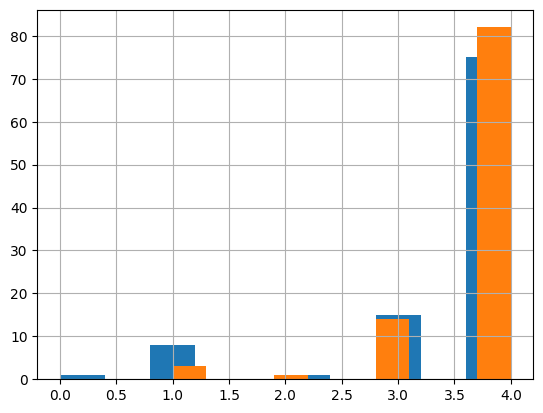

In [68]:
df_evalution_base_model["score"].hist(), df_evalution_base_model["score_context"].hist()

(<Axes: >, <Axes: >)

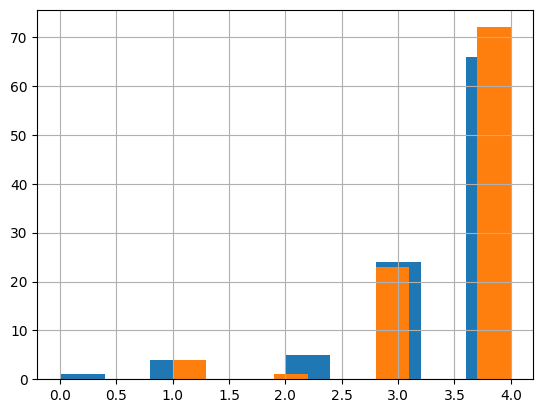

In [69]:
df_evalution_lora["score"].hist(), df_evalution_lora["score_context"].hist()

In [71]:
df_evalution_base_model["score_context"].describe(), df_evalution_lora["score_context"].describe()

(count    100.000000
 mean       3.750000
 std        0.625631
 min        1.000000
 25%        4.000000
 50%        4.000000
 75%        4.000000
 max        4.000000
 Name: score_context, dtype: float64,
 count    100.000000
 mean       3.630000
 std        0.705748
 min        1.000000
 25%        3.000000
 50%        4.000000
 75%        4.000000
 max        4.000000
 Name: score_context, dtype: float64)

In [76]:
def display_data(eval_list: list):
    for i in eval_list:
        print("QUESTION", i["question"])
        print()
        print("CONTEXT", i["context"])
        print()
        print("TARGET", i["target"])
        # print()
        # print("ANSWER", i["answer"])
        # print("EVALUTION", i["evalution"])
        print()
        print("ANSWER_CONTEXT", i["answer_context"])
        print("EVALUTION_CONTEXT", i["evalution_context"])
        print()
        print(
            "----------------------------------------------------------------------------------------"
        )

In [77]:
display_data(eval_list_base_model)

QUESTION –ß—Ç–æ –¥–µ–ª–∞—Ç—å –µ—Å–ª–∏ –Ω–µ –±–µ—Ä—É—Ç –∞ –ê—Ä–º–∏—é? –Ø –æ—á–µ–Ω—å —Ö–æ—á—É —Å–ª—É–∂–∏—Ç—å –†–æ—Å—Å–∏–∏.

CONTEXT –ü–µ—Ä–µ–¥ —Ç–µ–º –∫–∞–∫ –¥–∞—Ç—å –∫–æ–Ω—Å—É–ª—å—Ç–∞—Ü–∏—é –∏–∑—É—á–∏ –≤–æ–ø—Ä–æ—Å—ã –¥—Ä—É–≥–∏—Ö –ª—é–¥–µ–π –∏ –æ—Ç–≤–µ—Ç—ã –Ω–∞ –Ω–∏—Ö –¥—Ä—É–≥–∏—Ö —é—Ä–∏—Å—Ç–æ–≤:

    –í–æ–ø—Ä–æ—Å –≥—Ä–∞–∂–¥–∞–Ω–∏–Ω–∞:
    –ß—Ç–æ –¥–µ–ª–∞—Ç—å –µ—Å–ª–∏ –º–µ–Ω—è –Ω–µ –±–µ—Ä—É—Ç –≤ –∞—Ä–º–∏—é.
    –û—Ç–≤–µ—Ç —é—Ä–∏—Å—Ç–∞:
    –ù–∞—Å–ª–∞–∂–¥–∞—Ç—å—Å—è –∂–∏–∑–Ω—å—é.–ê –µ—Å–ª–∏ –≤–∞–º —Ç–∞–∫ —Ç—É–¥–∞ —Ö–æ—á–µ—Ç—Å—è-–æ–±–∂–∞–ª—É–π—Ç–µ —Ä–µ—à–µ–Ω–∏–µ –ø—Ä–∏–∑—ã–≤–Ω–æ–π –∫–æ–º–∏—Å—Å–∏–∏.
    
    –í–æ–ø—Ä–æ—Å –≥—Ä–∞–∂–¥–∞–Ω–∏–Ω–∞:
    –Ø —Ö–æ—á—É –≤ –ê—Ä–º–∏—é –Ω–æ –º–µ–Ω—è –Ω–µ –±–µ—Ä—É—Ç. –ü–æ –ø—Ä–∏—á–∏–Ω–µ –Ω–µ –∏–∑–≤–µ—Å—Ç–Ω–æ. –ß—Ç–æ –¥–µ–ª–∞—Ç—å. –û—á–µ–Ω—å —Ö–æ—á—É —Å–ª—É–∂–∏—Ç—å.
    –û—Ç–≤–µ—Ç —é—Ä–∏—Å—Ç–∞:
    –í–∞–º –Ω–µ —Å–∫–∞–∑–∞–ª–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –∫–æ–º–∏—Å—Å–∏–∏?
    
    –í–æ–ø—Ä–æ—Å –≥—Ä–∞–∂–¥–∞–Ω–∏–Ω–∞:
    –•–æ—á—É –≤ –∞—Ä–º–∏—é –∞ –Ω–µ –±–µ—Ä—É—Ç —á—Ç–

In [78]:
display_data(eval_list_lora)

QUESTION –ß—Ç–æ –¥–µ–ª–∞—Ç—å –µ—Å–ª–∏ –Ω–µ –±–µ—Ä—É—Ç –∞ –ê—Ä–º–∏—é? –Ø –æ—á–µ–Ω—å —Ö–æ—á—É —Å–ª—É–∂–∏—Ç—å –†–æ—Å—Å–∏–∏.

CONTEXT –ü–µ—Ä–µ–¥ —Ç–µ–º –∫–∞–∫ –¥–∞—Ç—å –∫–æ–Ω—Å—É–ª—å—Ç–∞—Ü–∏—é –∏–∑—É—á–∏ –≤–æ–ø—Ä–æ—Å—ã –¥—Ä—É–≥–∏—Ö –ª—é–¥–µ–π –∏ –æ—Ç–≤–µ—Ç—ã –Ω–∞ –Ω–∏—Ö –¥—Ä—É–≥–∏—Ö —é—Ä–∏—Å—Ç–æ–≤:

    –í–æ–ø—Ä–æ—Å –≥—Ä–∞–∂–¥–∞–Ω–∏–Ω–∞:
    –ß—Ç–æ –¥–µ–ª–∞—Ç—å –µ—Å–ª–∏ –º–µ–Ω—è –Ω–µ –±–µ—Ä—É—Ç –≤ –∞—Ä–º–∏—é.
    –û—Ç–≤–µ—Ç —é—Ä–∏—Å—Ç–∞:
    –ù–∞—Å–ª–∞–∂–¥–∞—Ç—å—Å—è –∂–∏–∑–Ω—å—é.–ê –µ—Å–ª–∏ –≤–∞–º —Ç–∞–∫ —Ç—É–¥–∞ —Ö–æ—á–µ—Ç—Å—è-–æ–±–∂–∞–ª—É–π—Ç–µ —Ä–µ—à–µ–Ω–∏–µ –ø—Ä–∏–∑—ã–≤–Ω–æ–π –∫–æ–º–∏—Å—Å–∏–∏.
    
    –í–æ–ø—Ä–æ—Å –≥—Ä–∞–∂–¥–∞–Ω–∏–Ω–∞:
    –Ø —Ö–æ—á—É –≤ –ê—Ä–º–∏—é –Ω–æ –º–µ–Ω—è –Ω–µ –±–µ—Ä—É—Ç. –ü–æ –ø—Ä–∏—á–∏–Ω–µ –Ω–µ –∏–∑–≤–µ—Å—Ç–Ω–æ. –ß—Ç–æ –¥–µ–ª–∞—Ç—å. –û—á–µ–Ω—å —Ö–æ—á—É —Å–ª—É–∂–∏—Ç—å.
    –û—Ç–≤–µ—Ç —é—Ä–∏—Å—Ç–∞:
    –í–∞–º –Ω–µ —Å–∫–∞–∑–∞–ª–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –∫–æ–º–∏—Å—Å–∏–∏?
    
    –í–æ–ø—Ä–æ—Å –≥—Ä–∞–∂–¥–∞–Ω–∏–Ω–∞:
    –•–æ—á—É –≤ –∞—Ä–º–∏—é –∞ –Ω–µ –±–µ—Ä—É—Ç —á—Ç–

In [38]:
df_evalute.to_pickle("data/interim/evalutions/result/100_prompt_Qwen2.5-7B-Instruct.pkl")

In [5]:
df_evalute = pd.read_pickle("data/interim/evalutions/result/100_prompt_Qwen2.5-7B-Instruct.pkl")

(<Axes: >, <Axes: >)

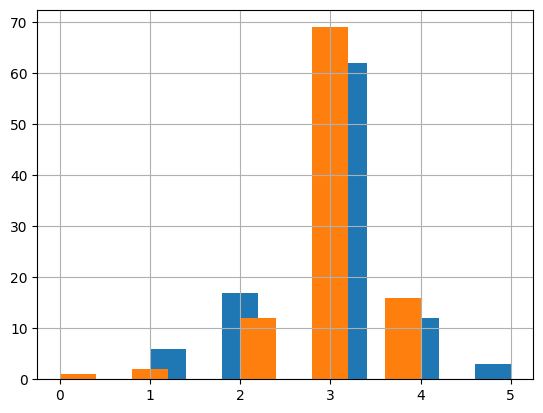

In [7]:
df_evalute["score"].hist(), df_evalute["score_context"].hist()

In [21]:
df_0 = df_evalute[df_evalute["score_context"] == 3]

In [22]:
display_data(df_0.to_dict("records"))

QUESTION –ú–æ–∂–µ—Ç –ª–∏ —Ä–µ–±—ë–Ω–æ–∫ —Å —Ä–æ—Å—Å–∏–π—Å–∫–∏–º –≥—Ä–∞–∂–¥–∞–Ω—Å—Ç–≤–æ–º –±—ã—Ç—å –ø–µ—Ä–µ–≤–µ–¥—ë–Ω –≤ —à–∫–æ–ª—É –ö–ó? –ü–æ –Ω–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ –∫–∞–∑–∞—Ö. –ë–µ–∑ –≤–Ω–∂, –≤–Ω–∂ –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ.

CONTEXT –ü–µ—Ä–µ–¥ —Ç–µ–º –∫–∞–∫ –¥–∞—Ç—å –∫–æ–Ω—Å—É–ª—å—Ç–∞—Ü–∏—é –∏–∑—É—á–∏ –≤–æ–ø—Ä–æ—Å—ã –¥—Ä—É–≥–∏—Ö –ª—é–¥–µ–π –∏ –æ—Ç–≤–µ—Ç—ã –Ω–∞ –Ω–∏—Ö –¥—Ä—É–≥–∏—Ö —é—Ä–∏—Å—Ç–æ–≤:

    –í–æ–ø—Ä–æ—Å –≥—Ä–∞–∂–¥–∞–Ω–∏–Ω–∞:
    –ú–æ–∂–µ—Ç –ª–∏ —Ä–µ–±—ë–Ω–æ–∫ —Å –ö–∞–∑–∞—Ö—Å—Ç–∞–Ω—Å–∫–∏–º –≥—Ä–∞–∂–¥–∞–Ω—Å—Ç–≤–æ–º –ø–æ–π—Ç–∏–≤ –≤ —à–∫–æ–ª—É –≤ –†–æ—Å—Å–∏–∏.
    –û—Ç–≤–µ—Ç —é—Ä–∏—Å—Ç–∞:
    –ü—Ä–æ–∂–∏–≤–∞—è –ø–æ –º–µ—Å—Ç—É –∂–∏—Ç–µ–ª—å—Å—Ç–≤–∞ –æ–¥–Ω–æ–≥–æ –∏–∑ —Ä–æ–¥–∏—Ç–µ–ª–µ–π, —Ä–µ–±—ë–Ω–æ–∫ –∏–º–µ–µ—Ç –ø—Ä–∞–≤–æ –∏–¥—Ç–∏ –≤ —à–∫–æ–ª—É —Å –ª—é–±—ã–º –≥—Ä–∞–∂–¥–∞–Ω—Å—Ç–≤–æ–º, –ª–∏—à—å –±—ã —Ö–æ—Ç–µ–ª —É—á–∏—Ç—å—Å—è.
    
    –í–æ–ø—Ä–æ—Å –≥—Ä–∞–∂–¥–∞–Ω–∏–Ω–∞:
    –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ! –Ø —Ö–æ—Ç–µ–ª–∞ —É–∑–Ω–∞—Ç—å, –º–æ–≥—É –ª–∏ —è –æ—Ç–¥–∞—Ç—å —Å–≤–æ–µ–≥–æ —Ä–µ–±–µ–Ω–∫

In [24]:
from unsloth import FastLanguageModel

max_seq_length = 2048  # Choose any! We auto support RoPE Scaling internally!
dtype = None  # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True  # Use 4bit quantization to reduce memory usage. Can be False.

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name="./models/qwen/vllm",  # YOUR MODEL YOU USED FOR TRAINING
    max_seq_length=max_seq_length,
    dtype=dtype,
    load_in_4bit=load_in_4bit,
)
FastLanguageModel.for_inference(model)  # Enable native 2x faster inference

==((====))==  Unsloth 2025.1.5: Fast Qwen2 patching. Transformers: 4.47.1.
   \\   /|    GPU: NVIDIA GeForce RTX 4090. Max memory: 23.542 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.5.1+cu124. CUDA: 8.9. CUDA Toolkit: 12.4. Triton: 3.1.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.28.post3. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Qwen2ForCausalLM(
  (model): Qwen2Model(
    (embed_tokens): Embedding(152064, 3584, padding_idx=151665)
    (layers): ModuleList(
      (0-27): 28 x Qwen2DecoderLayer(
        (self_attn): Qwen2Attention(
          (q_proj): Linear4bit(in_features=3584, out_features=3584, bias=True)
          (k_proj): Linear4bit(in_features=3584, out_features=512, bias=True)
          (v_proj): Linear4bit(in_features=3584, out_features=512, bias=True)
          (o_proj): Linear4bit(in_features=3584, out_features=3584, bias=False)
          (rotary_emb): LlamaRotaryEmbedding()
        )
        (mlp): Qwen2MLP(
          (gate_proj): Linear4bit(in_features=3584, out_features=18944, bias=False)
          (up_proj): Linear4bit(in_features=3584, out_features=18944, bias=False)
          (down_proj): Linear4bit(in_features=18944, out_features=3584, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): Qwen2RMSNorm((3584,), eps=1e-06)
        (post_attention_layernorm): Qwen2RMSNorm((